In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
path = '/home/e2018136018/notebook/'

In [4]:
PUK_data = pd.read_csv(path+'PUK_data.csv') # 부산 울산 경남
SGI_data = pd.read_csv(path+'SGI_data.csv') # 서울 경기 인천

/home/e2018136018/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
PUK_data.index = pd.to_datetime(PUK_data['측정일시']) #측정일시를 index로 지정
SGI_data.index = pd.to_datetime(SGI_data['측정일시'])

In [6]:
PUK_data #데이터 모양 확인

,측정일시,PM10,PM25,망
측정일시,,,,
2016-01-01 01:00:00,2016-01-01 01:00:00,47.0,NaN,NaN
2016-01-01 02:00:00,2016-01-01 02:00:00,44.0,NaN,NaN
2016-01-01 03:00:00,2016-01-01 03:00:00,43.0,NaN,NaN
2016-01-01 04:00:00,2016-01-01 04:00:00,36.0,NaN,NaN
2016-01-01 05:00:00,2016-01-01 05:00:00,35.0,NaN,NaN
...,...,...,...,...
2019-09-30 20:00:00,2019-09-30 20:00:00,NaN,NaN,도시대기
2019-09-30 21:00:00,2019-09-30 21:00:00,NaN,NaN,도시대기
2019-09-30 22:00:00,2019-09-30 22:00:00,NaN,NaN,도시대기


In [16]:
(SGI_data['PM10'].mean(),PUK_data['PM10'].mean()) #전체 데이터 산술평균

(47.165517458289784, 41.05901712573374)

In [18]:
(SGI_data['PM25'].mean(),PUK_data['PM25'].mean())

(25.214475265061843, 22.38858801589491)

In [6]:
PUK_data['망'].unique() #관측망 종류 확인

array([nan, '도시대기', '도로변대기', '교외대기', '국가배경농도'], dtype=object)

In [ ]:
# backg는 교외(background), urban은 도시지역
# 도시대기와 도로변대기를 도시지역으로, 교외대기와 국가배경농도를 교외지역으로 가정
# 이를 일평균자료로 바꿈

In [51]:
SGI_urban = SGI_data.loc[:,('PM10','PM25')].where((SGI_data['망'] == '도시대기') | (SGI_data['망'] == '도로변대기')).resample('1D').mean()   
SGI_backg = SGI_data.loc[:,('PM10','PM25')].where((SGI_data['망'] == '국가배경농도') | (SGI_data['망'] == '교외대기')).resample('1D').mean()

PUK_urban = PUK_data.loc[:,('PM10','PM25')].where((PUK_data['망'] == '도시대기') | (PUK_data['망'] == '도로변대기')).resample('1D').mean()
PUK_backg = PUK_data.loc[:,('PM10','PM25')].where((PUK_data['망'] == '국가배경농도') | (PUK_data['망'] == '교외대기')).resample('1D').mean()

In [52]:
# PM10  기준 30, 80, 150
# PM2.5 기준 15, 35, 75

In [53]:
SGI_backg_PM10 = np.array([SGI_backg['PM10'].where(SGI_urban['PM10'] <= 30).dropna(), 
                          SGI_backg['PM10'].where((SGI_urban['PM10'] > 30) & (SGI_urban['PM10'] <= 80)).dropna(), 
                          SGI_backg['PM10'].where((SGI_urban['PM10'] > 80) & (SGI_urban['PM10'] <= 150)).dropna(),
                          SGI_backg['PM10'].where(SGI_urban['PM10'] > 150).dropna()])

SGI_urban_PM10 = np.array([SGI_urban['PM10'].where(SGI_urban['PM10'] <= 30).dropna(), 
                          SGI_urban['PM10'].where((SGI_urban['PM10'] > 30) & (SGI_urban['PM10'] <= 80)).dropna(), 
                          SGI_urban['PM10'].where((SGI_urban['PM10'] > 80) & (SGI_urban['PM10'] <= 150)).dropna(),
                          SGI_urban['PM10'].where(SGI_urban['PM10'] > 150).dropna()])

SGI_backg_PM25 = np.array([SGI_backg['PM25'].where(SGI_urban['PM25'] <= 15).dropna(), 
                          SGI_backg['PM25'].where((SGI_urban['PM25'] > 15) & (SGI_urban['PM25'] <= 50)).dropna(), 
                          SGI_backg['PM25'].where((SGI_urban['PM25'] > 50) & (SGI_urban['PM25'] <= 100)).dropna(),
                          SGI_backg['PM25'].where(SGI_urban['PM25'] > 100).dropna()])

SGI_urban_PM25 = np.array([SGI_urban['PM25'].where(SGI_urban['PM25'] <= 15).dropna(), 
                          SGI_urban['PM25'].where((SGI_urban['PM25'] > 15) & (SGI_urban['PM25'] <= 35)).dropna(), 
                          SGI_urban['PM25'].where((SGI_urban['PM25'] > 35) & (SGI_urban['PM25'] <= 75)).dropna(),
                          SGI_urban['PM25'].where(SGI_urban['PM25'] > 75).dropna()])

In [54]:
PUK_backg_PM10 = np.array([PUK_backg['PM10'].where(PUK_urban['PM10'] <= 30).dropna(), 
                          PUK_backg['PM10'].where((PUK_urban['PM10'] > 30) & (PUK_urban['PM10'] <= 80)).dropna(), 
                          PUK_backg['PM10'].where((PUK_urban['PM10'] > 80) & (PUK_urban['PM10'] <= 150)).dropna(),
                          PUK_backg['PM10'].where(PUK_urban['PM10'] > 150).dropna()])

PUK_urban_PM10 = np.array([PUK_urban['PM10'].where(PUK_urban['PM10'] <= 30).dropna(), 
                          PUK_urban['PM10'].where((PUK_urban['PM10'] > 30) & (PUK_urban['PM10'] <= 80)).dropna(), 
                          PUK_urban['PM10'].where((PUK_urban['PM10'] > 80) & (PUK_urban['PM10'] <= 150)).dropna(),
                          PUK_urban['PM10'].where(PUK_urban['PM10'] > 150).dropna()])

PUK_backg_PM25 = np.array([PUK_backg['PM25'].where(PUK_urban['PM25'] <= 15).dropna(), 
                          PUK_backg['PM25'].where((PUK_urban['PM25'] > 15) & (PUK_urban['PM25'] <= 35)).dropna(), 
                          PUK_backg['PM25'].where((PUK_urban['PM25'] > 35) & (PUK_urban['PM25'] <= 75)).dropna(),
                          PUK_backg['PM25'].where(PUK_urban['PM25'] > 75).dropna()])

PUK_urban_PM25 = np.array([PUK_urban['PM25'].where(PUK_urban['PM25'] <= 15).dropna(), 
                          PUK_urban['PM25'].where((PUK_urban['PM25'] > 15) & (PUK_urban['PM25'] <= 35)).dropna(), 
                          PUK_urban['PM25'].where((PUK_urban['PM25'] > 35) & (PUK_urban['PM25'] <= 75)).dropna(),
                          PUK_urban['PM25'].where(PUK_urban['PM25'] > 75).dropna()])

In [55]:
SGI_PM10_count = np.zeros([4])
PUK_PM10_count = np.zeros([4])
SGI_PM25_count = np.zeros([4])
PUK_PM25_count = np.zeros([4])
# event의 발생 횟수를 세야하므로 len 함수 사용
for i in range(4):
    SGI_PM10_count[i] = len(SGI_urban_PM10[i])
    PUK_PM10_count[i] = len(PUK_urban_PM10[i])
    SGI_PM25_count[i] = len(SGI_urban_PM25[i])
    PUK_PM25_count[i] = len(PUK_urban_PM25[i])

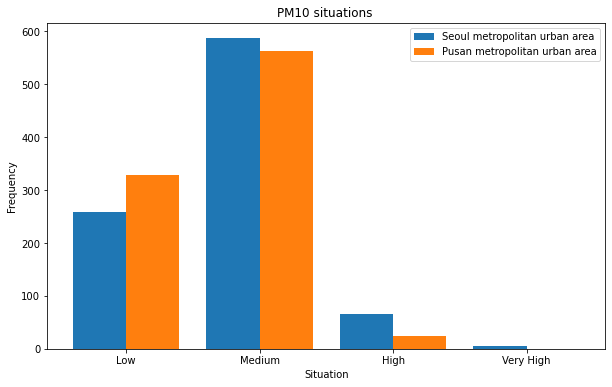

In [56]:
plt.figure(figsize=(10,6))
plt.bar((0.8,1.8,2.8,3.8), SGI_PM10_count, .4, label='Seoul metropolitan urban area')
plt.bar((1.2,2.2,3.2,4.2), PUK_PM10_count, .4, label='Pusan metropolitan urban area')
plt.xticks((1,2,3,4), ['Low','Medium','High','Very High'])
plt.xlabel('Situation') ; plt.ylabel('Frequency')
plt.legend()
plt.title('PM10 situations ')
plt.show()

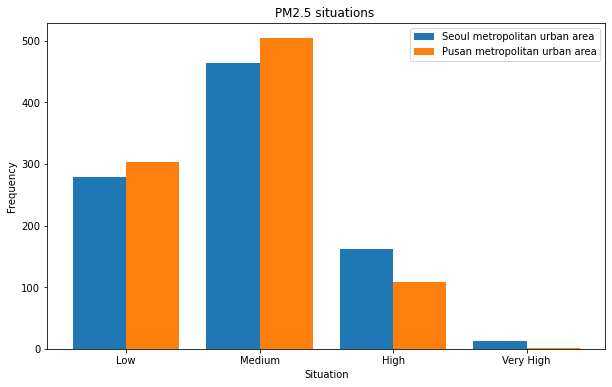

In [57]:
plt.figure(figsize=(10,6))
plt.bar((0.8,1.8,2.8,3.8), SGI_PM25_count, .4, label='Seoul metropolitan urban area')
plt.bar((1.2,2.2,3.2,4.2), PUK_PM25_count, .4, label='Pusan metropolitan urban area')
plt.xticks((1,2,3,4), ['Low','Medium','High','Very High'])
plt.xlabel('Situation') ; plt.ylabel('Frequency')
plt.legend()
plt.title('PM2.5 situations ')
plt.show()

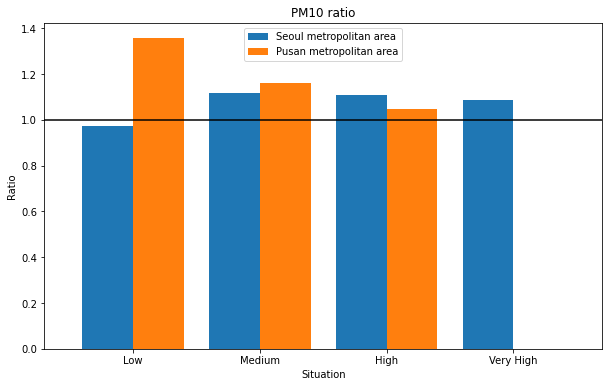

In [64]:
SGI_PM10_ratio = np.zeros(4)
PUK_PM10_ratio = np.zeros(4)

for i in range(4):
    SGI_PM10_ratio[i] = (SGI_urban_PM10[i]/SGI_backg_PM10[i]).mean()
    PUK_PM10_ratio[i] = (PUK_urban_PM10[i]/PUK_backg_PM10[i]).mean()
#도시 / 교외
    
plt.figure(figsize=(10,6))
plt.bar((0.8,1.8,2.8,3.8), SGI_PM10_ratio, .4, label='Seoul metropolitan area')
plt.bar((1.2,2.2,3.2,4.2), PUK_PM10_ratio, .4, label='Pusan metropolitan area')
plt.axhline(y=1., c='k')
plt.xticks((1,2,3,4), ['Low','Medium','High','Very High'])
plt.xlim(0.3,4.7)
plt.xlabel('Situation') ; plt.ylabel('Ratio')
plt.legend()
plt.title('PM10 ratio')
plt.show()

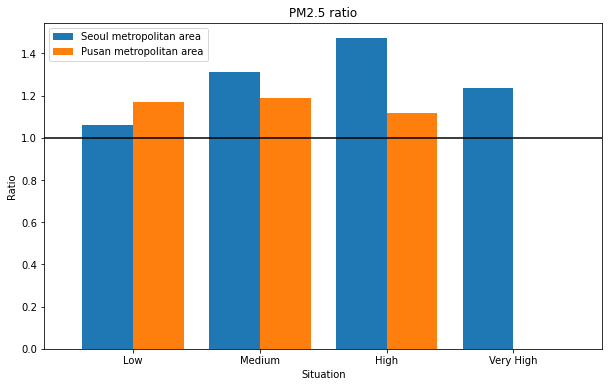

In [59]:
SGI_PM25_ratio = np.zeros(4)
PUK_PM25_ratio = np.zeros(4)

for i in range(4):
    SGI_PM25_ratio[i] = (SGI_urban_PM25[i]/SGI_backg_PM25[i]).mean()
    PUK_PM25_ratio[i] = (PUK_urban_PM25[i]/PUK_backg_PM25[i]).mean()

    
plt.figure(figsize=(10,6))
plt.bar((0.8,1.8,2.8,3.8), SGI_PM25_ratio, .4, label='Seoul metropolitan area')
plt.bar((1.2,2.2,3.2,4.2), PUK_PM25_ratio, .4, label='Pusan metropolitan area')
plt.axhline(y=1., c='k')
plt.xticks((1,2,3,4), ['Low','Medium','High','Very High'])
plt.xlim(0.3,4.7)
plt.xlabel('Situation') ; plt.ylabel('Ratio')
plt.legend()
plt.title('PM2.5 ratio')
plt.show()

In [60]:
SGI_PM10_ratio, SGI_PM25_ratio, PUK_PM10_ratio, PUK_PM25_ratio
# 부산이 매우높음을 기록할 때는 관측망 종류가 기록되지 않아서 NaN

(array([0.97336974, 1.11682418, 1.10782096, 1.08801693]),
 array([1.06152876, 1.31200881, 1.47199894, 1.23406493]),
 array([1.3569042 , 1.15990684, 1.04651671,        nan]),
 array([1.16780092, 1.18695045, 1.11627243,        nan]))

In [16]:
SGI_month = SGI_data.loc[:,('PM10','PM25')].groupby(SGI_data.index.month).mean() #월별로 평균
PUK_month = PUK_data.loc[:,('PM10','PM25')].groupby(PUK_data.index.month).mean()

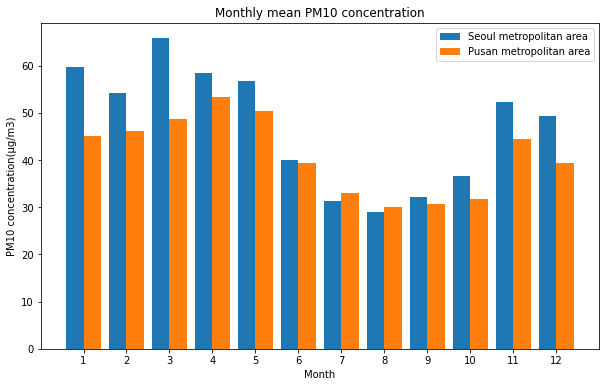

In [17]:
month_idx = np.arange(1,13,1) #1월부터 12월까지

plt.figure(figsize=(10,6))
plt.bar(month_idx-0.2, SGI_month['PM10'], 0.4, label='Seoul metropolitan area')
plt.bar(month_idx+0.2, PUK_month['PM10'], 0.4, label='Pusan metropolitan area')
plt.xticks((month_idx))
plt.xlabel('Month') ; plt.ylabel('PM10 concentration(µg/m3)')
plt.legend()
plt.title('Monthly mean PM10 concentration')
plt.show()

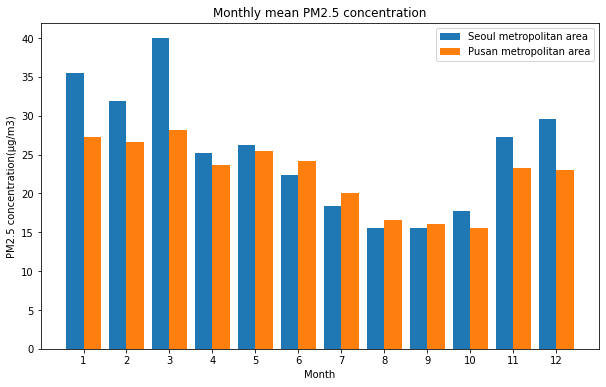

In [18]:
plt.figure(figsize=(10,6))
plt.bar(month_idx-0.2, SGI_month['PM25'], 0.4, label='Seoul metropolitan area')
plt.bar(month_idx+0.2, PUK_month['PM25'], 0.4, label='Pusan metropolitan area')
plt.xticks((month_idx))
plt.xlabel('Month') ; plt.ylabel('PM2.5 concentration(µg/m3)')
plt.legend()
plt.title('Monthly mean PM2.5 concentration')
plt.show()

In [19]:
SGI_monthly = SGI_data.loc[:,'PM10':'PM25'] #box plot은 자료 형태가 조금 다름
PUK_monthly = PUK_data.loc[:,'PM10':'PM25']

In [20]:
SGI_monthly['month'] = SGI_monthly.index.strftime('%b') #인덱스의 월 데이터를 영어로 추출 (ex. 1 -> Jan)
PUK_monthly['month'] = PUK_monthly.index.strftime('%b')

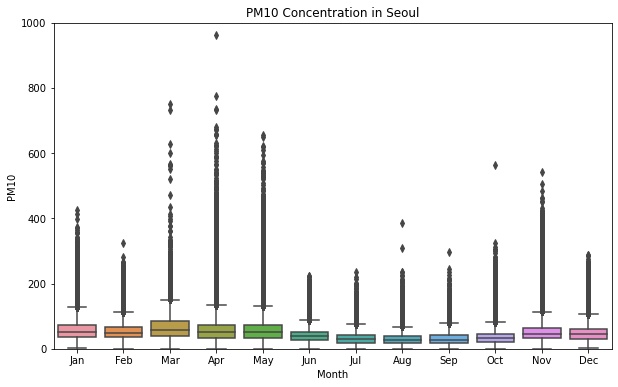

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='PM10',data=SGI_monthly)
plt.title('PM10 Concentration in Seoul')
plt.xlabel('Month')
plt.ylim(0,1000)
plt.show()

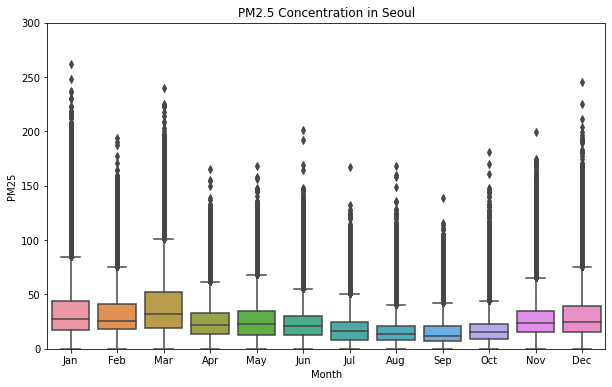

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='PM25',data=SGI_monthly)
plt.title('PM2.5 Concentration in Seoul')
plt.xlabel('Month')
plt.ylim(0,300)
plt.show()

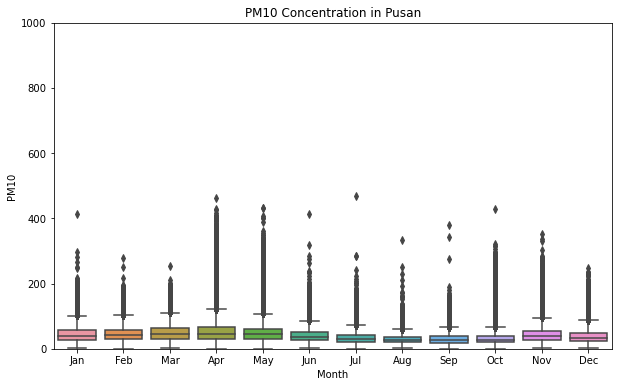

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='PM10',data=PUK_monthly)
plt.title('PM10 Concentration in Pusan')
plt.xlabel('Month')
plt.ylim(0,1000)
plt.show()

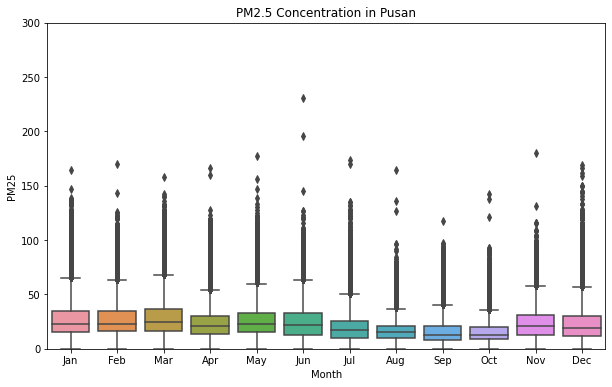

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='PM25',data=PUK_monthly)
plt.title('PM2.5 Concentration in Pusan')
plt.xlabel('Month')
plt.ylim(0,300)
plt.show()

In [20]:
SGI_year = SGI_data.loc[:,('PM10','PM25')].groupby(SGI_data.index.year).mean().iloc[0:4,:] #연평균 자료
PUK_year = PUK_data.loc[:,('PM10','PM25')].groupby(PUK_data.index.year).mean().iloc[0:4,:]
SGI_year, PUK_year

(           PM10       PM25
 측정일시                      
 2016  51.627589  26.707763
 2017  49.509917  25.860906
 2018  43.061531  24.063278
 2019  44.873786  25.228311,
            PM10       PM25
 측정일시                      
 2016  44.002546  25.750560
 2017  43.127763  24.564405
 2018  40.914425  21.905137
 2019  37.126172  19.878390)

In [29]:
SGI_year['PM10']

측정일시
2016    51.627589
2017    49.509917
2018    43.061531
2019    44.873786
Name: PM10, dtype: float64

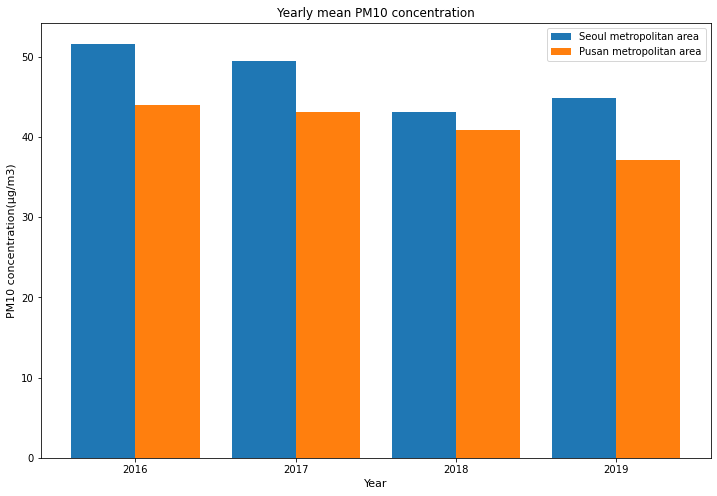

In [41]:
year_idx = np.arange(2016,2020,1) #4년간 자료 연 인덱스

plt.figure(figsize=(12,8))
plt.bar(year_idx-0.2, SGI_year['PM10'], 0.4, label='Seoul metropolitan area')
plt.bar(year_idx+0.2, PUK_year['PM10'], 0.4, label='Pusan metropolitan area')
plt.xticks(year_idx)
plt.xlabel('Year', fontsize=11) ; plt.ylabel('PM10 concentration(µg/m3)', fontsize=11)
plt.legend()
plt.title('Yearly mean PM10 concentration')

plt.show()

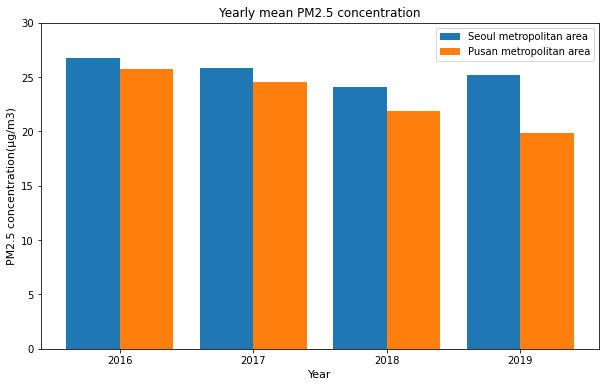

In [52]:
plt.figure(figsize=(10,6))
plt.bar(year_idx-0.2, SGI_year['PM25'], 0.4, label='Seoul metropolitan area')
plt.bar(year_idx+0.2, PUK_year['PM25'], 0.4, label='Pusan metropolitan area')
plt.xticks(year_idx)
plt.xlabel('Year', fontsize=11) ; plt.ylabel('PM2.5 concentration(µg/m3)', fontsize=11)
plt.ylim(0,30)
plt.legend()
plt.title('Yearly mean PM2.5 concentration')
plt.show()

In [44]:
SGI = SGI_data.resample('1D').mean() #일평균 자료
PUK = PUK_data.resample('1D').mean()

In [45]:
SGI_PM10_high = SGI[SGI['PM10'] > 80] #기준치 넘을때만 남김
SGI_PM25_high = SGI[SGI['PM25'] > 35]

PUK_PM10_high = PUK[PUK['PM10'] > 80]
PUK_PM25_high = PUK[PUK['PM25'] > 35]

In [46]:
SGI_PM10_high.groupby(SGI_PM10_high.index.year).count()['PM10'], SGI_PM25_high.groupby(SGI_PM25_high.index.year).count()['PM25']
#연도별 발생횟수 세야하므로 year로 groupby해서 묶고 count

(측정일시
 2016    31
 2017    31
 2018    23
 2019    32
 Name: PM10, dtype: int64,
 측정일시
 2016    77
 2017    80
 2018    73
 2019    70
 Name: PM25, dtype: int64)

In [47]:
PUK_PM10_high.groupby(PUK_PM10_high.index.year).count()['PM10'], PUK_PM25_high.groupby(PUK_PM25_high.index.year).count()['PM25']

(측정일시
 2016    16
 2017    11
 2018    15
 2019     9
 Name: PM10, dtype: int64,
 측정일시
 2016    66
 2017    58
 2018    58
 2019    34
 Name: PM25, dtype: int64)

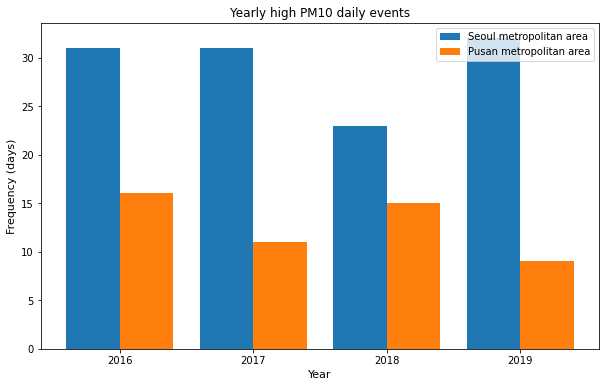

In [80]:
plt.figure(figsize=(10,6))
plt.bar(year_idx-0.2, SGI_PM10_high.groupby(SGI_PM10_high.index.year).count()['PM10'], 0.4, label='Seoul metropolitan area')
plt.bar(year_idx+0.2, PUK_PM10_high.groupby(PUK_PM10_high.index.year).count()['PM10'], 0.4, label='Pusan metropolitan area')
plt.xticks(year_idx)
plt.xlabel('Year', fontsize=11) ; plt.ylabel('Frequency (days)', fontsize=11)
plt.legend()
plt.title('Yearly high PM10 daily events')
plt.show()

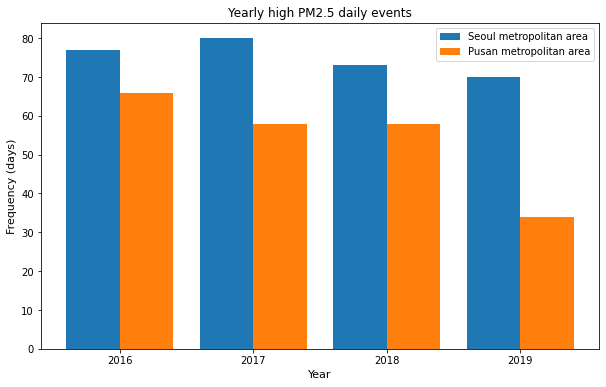

In [82]:
plt.figure(figsize=(10,6))
plt.bar(year_idx-0.2, SGI_PM25_high.groupby(SGI_PM25_high.index.year).count()['PM25'], 0.4, label='Seoul metropolitan area')
plt.bar(year_idx+0.2, PUK_PM25_high.groupby(PUK_PM25_high.index.year).count()['PM25'], 0.4, label='Pusan metropolitan area')
plt.xticks(year_idx)
plt.xlabel('Year', fontsize=11) ; plt.ylabel('Frequency (days)', fontsize=11)
plt.legend()
plt.title('Yearly high PM2.5 daily events')
plt.show()

In [61]:
SGI_data.loc[:,('PM10','PM25')].groupby(SGI_data.index.hour).mean()
# 시간별로 평균낸 자료

,PM10,PM25
측정일시,,
0,46.567207,25.493753
1,46.548772,25.693651
2,46.176993,25.845548
3,45.160069,25.783320
4,43.989307,25.324890
5,43.385090,25.082148
6,43.341399,24.910302
7,44.383852,25.233294
8,46.097681,25.751846


In [62]:
PUK_data.loc[:,('PM10','PM25')].groupby(PUK_data.index.hour).mean()

,PM10,PM25
측정일시,,
0,39.697831,22.497600
1,38.933697,22.329199
2,38.029459,21.805376
3,37.471853,21.902942
4,37.141693,21.855785
5,36.956777,21.855776
6,37.183263,21.984226
7,38.439107,22.582381
8,41.051320,23.582500
